<a href="https://colab.research.google.com/github/drpetros11111/Tensorflow_Portilia/blob/ANN/00_Keras_Syntax_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

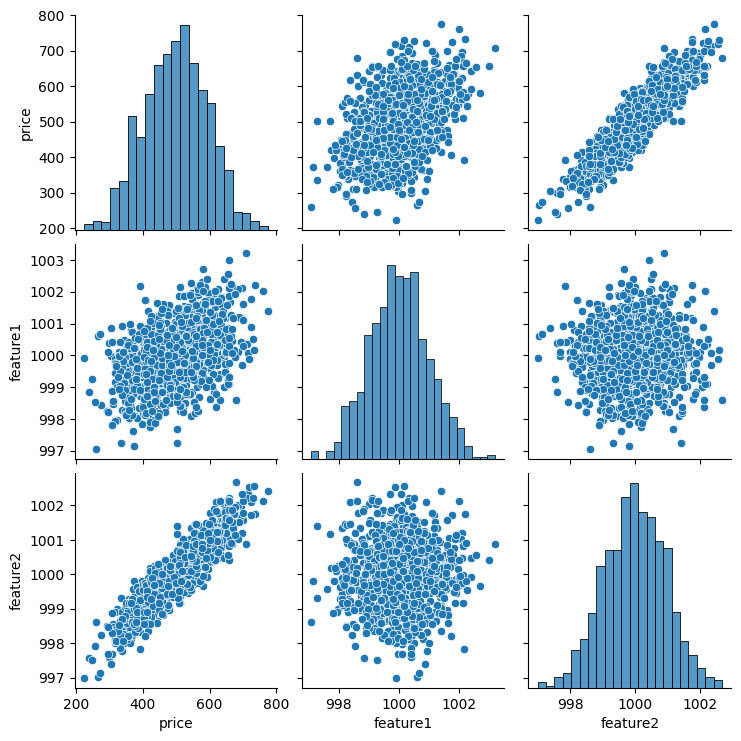

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
y_train.shape

(700,)

In [15]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearily
 |  scales them down into a fixed range, where the largest occuring data point
 |  corresponds to the maximum value and the smallest one 

In [19]:
scaler = MinMaxScaler()

In [ ]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [20]:
scaler.fit(X_train)

MinMaxScaler()

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential

In [ ]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [25]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [26]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [ ]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# RMSprop (Root Mean Square Propagation)

is an optimization algorithm commonly used to train artificial neural networks and other machine learning models.

It was introduced by Geoffrey Hinton in his Coursera lecture and has become a popular choice due to its effectiveness in handling non-stationary objectives and adapting the learning rate during training.

------
#Key Concepts
##Optimization in Machine Learning:

In machine learning, particularly in training neural networks, optimization algorithms are used to minimize a loss function by adjusting the model's parameters (weights and biases).

The goal is to find the set of parameters that result in the lowest possible error on the training data.

-----------------------

##Stochastic Gradient Descent (SGD):

A foundational optimization method where parameters are updated in the opposite direction of the gradient of the loss function with respect to the parameters.

While simple and widely used, standard SGD can suffer from issues like slow convergence and getting stuck in local minima.

---------------------
#How RMSprop Works
RMSprop enhances SGD by adapting the learning rate for each parameter individually based on the average of recent gradients. Here's how it operates:

-----------
#Maintain a Moving Average of Squared Gradients:

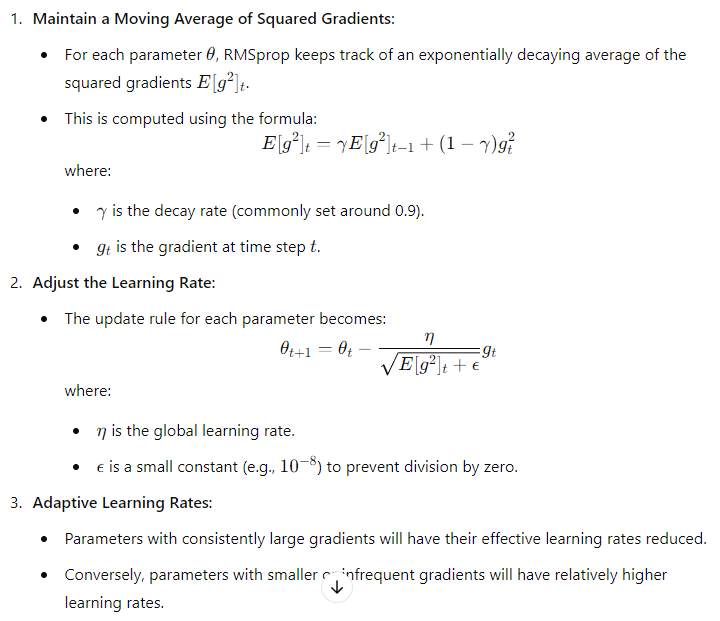


In the context of RMSprop, the decay rate of 0.9 controls how much past gradients contribute to the running average of squared gradients. This running average helps adjust the learning rate dynamically.

More Specifically:
Decay Rate Formula: The decaying average of squared gradients

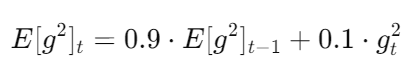

##What the Decay Rate Controls:

The decay rate (0.9 in this case) controls the weight given to past gradients versus the current gradient.

A decay rate of 0.9 means that 90% of the running average comes from the past gradients, and 10% comes from the current gradient.

This ensures that the average is smooth but still responsive to changes in the gradient.

##Exponential Decay of Influence:

The influence of past gradients decays exponentially as time progresses. With a decay rate of 0.9, each previous gradient contributes less and less over time, but past gradients are never completely forgotten.

##Interpretation of a Decay Rate of 0.9:

Slowly Forgetting Past Information: A decay rate of 0.9 gives significant weight to previous gradients, which means it smooths out sudden changes and variations in the gradient.

Responsiveness to New Information: It still gives a small but non-negligible weight (0.1) to the current gradient, ensuring that the algorithm can respond to sudden shifts or new patterns in the loss landscape.

--------------------------------
##Why 0.9 is Often Used:
A value of 0.9 provides a good balance between:

Smoothing: The running average of squared gradients is not too volatile.

Adaptability: The model can still adapt to new trends in the data or loss landscape.

If the decay rate is too high (e.g., 0.99), the optimizer might be too slow to react to changes in gradients, and if it's too low (e.g., 0.5), it might overreact to recent changes and make the optimization process unstable.

Practical Effect:
With a decay rate of 0.9, the optimizer will smooth out noisy gradients over time but still allow for reasonable responsiveness to new information.

This helps RMSprop avoid the problem of overshooting or being stuck in local minima by adapting learning rates based on recent changes in the gradient

-------------------------------
#Advantages of RMSprop
##Adaptive Learning Rates:
Automatically adjusts the learning rate for each parameter, reducing the need for manual tuning.

##Efficient Handling of Non-Stationary Objectives:
Particularly effective for online and mini-batch learning scenarios where data distributions may change over time.

##Improved Convergence:
Tends to converge faster than standard SGD, especially in deep neural networks.

--------------------------------
#Comparison with Other Optimizers
##SGD (Stochastic Gradient Descent):
Pros: Simple and widely understood.

Cons: Requires careful tuning of the learning rate; can be slow to converge.

----------------------------
#AdaGrad:
Pros: Adapts learning rates based on the frequency of parameters' updates.

Cons: Accumulates squared gradients, leading to a monotonically decreasing learning rate which can become too small.

----------------------------
#Adam (Adaptive Moment Estimation):
Pros: Combines the benefits of RMSprop and Momentum; widely used due to robust performance across various tasks.

Cons: Slightly more complex; may require more memory.

-----------------------
#RMSprop:
Pros: Balances adaptability and computational efficiency; avoids the diminishing learning rates issue of AdaGrad.

Cons: May require tuning of hyperparameters like the decay rate
𝛾.

-----------------------------------
#When to Use RMSprop
##Recurrent Neural Networks (RNNs):
RMSprop is particularly effective for training RNNs, which benefit from adaptive learning rates due to their sequential nature.


##Online and Mini-Batch Learning:
Suitable for scenarios where data comes in streams or is processed in small batches.

##Deep Learning Models:
Often preferred in deep learning frameworks due to its ability to handle complex loss landscapes.

---------------------------
#Implementation Example
Here's how you might implement RMSprop using popular deep learning libraries:

##Using TensorFlow/Keras:

    from tensorflow.keras.optimizers import RMSprop

# Initialize the RMSprop optimizer
    optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

What rho Controls:
Rho (ρ) is the parameter that determines how much weight is given to past squared gradients versus the current squared gradient in the running average.

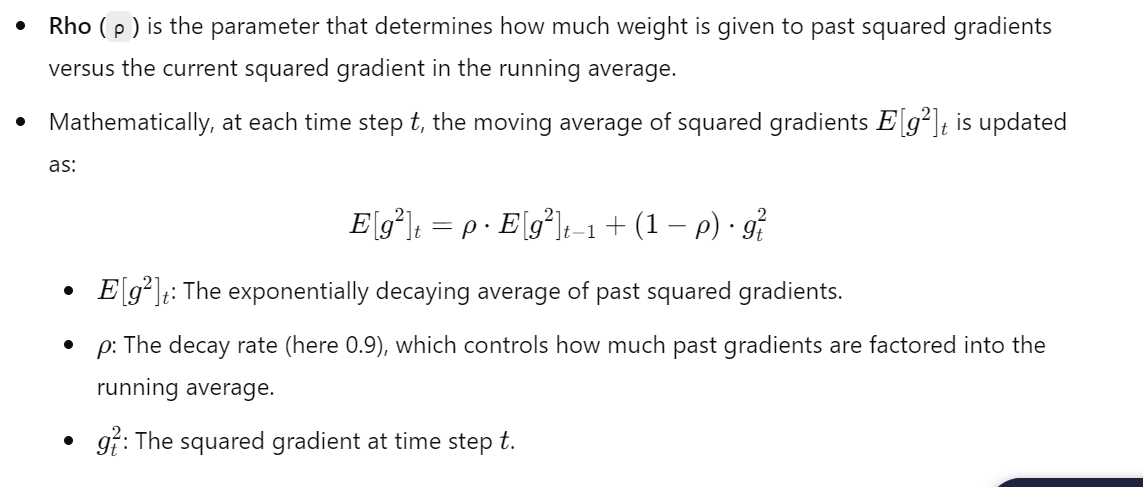

##What Does rho=0.9 Mean?
When rho=0.9, it means that 90% of the previous squared gradient average is carried over to the next time step, while 10% comes from the current squared gradient.

##How rho Affects Optimization:

###High rho (e.g., 0.99):

The optimizer places more emphasis on past gradients. This leads to smoother updates, but it might make the optimizer less responsive to changes in the loss landscape.

###Low rho (e.g., 0.5):

The optimizer gives more weight to recent gradients, making it more responsive to changes but also potentially more sensitive to noise in the gradient.

-----------------------------------
#The Role of rho in RMSprop:
##Smoothing:
The rho parameter smooths the learning process by averaging squared gradients over time, preventing abrupt changes in the learning rate.

##Adaptive Learning Rate:

By maintaining a running average of squared gradients, RMSprop adapts the learning rate for each parameter, allowing the optimizer to adjust to the curvature of the loss function and avoid large steps when gradients are high.

In summary, rho=0.9 is a typical choice in RMSprop that provides a balance between responsiveness and stability, ensuring the optimizer doesn't overreact to sudden changes in the gradient while still allowing it to adapt gradually over time.

---------------------------------
------------------------------------------------
# Compile a Keras model with RMSprop
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

##Using PyTorch:

    import torch.optim as optim

# Assume 'model' is your neural network
    optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99, eps=1e-08)

# In your training loop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In PyTorch, optimizer.zero_grad() is a crucial step in the training loop of a neural network. It clears or resets the gradients of all the model parameters before performing a new optimization step.

##Why Do We Need optimizer.zero_grad()?
During the training process, PyTorch accumulates the gradients of the loss function with respect to the model's parameters.

This is because gradients are computed through backpropagation and added to the existing gradients stored in the parameter tensors.

If you don't reset the gradients to zero before each optimization step, the gradients would accumulate from previous batches, which would interfere with the current gradient update and lead to incorrect parameter updates.

###Key Points:
Gradient Accumulation in PyTorch:

In PyTorch, gradients are not automatically overwritten. Instead, they are accumulated (i.e., summed up) across batches.

This behavior is useful for techniques like gradient accumulation when updating the model parameters less frequently (e.g., after several batches), but for most scenarios, you want to reset the gradients to zero before each new backpropagation.

What optimizer.zero_grad() Does:

It resets the gradients of all the parameters in the model to zero.
This ensures that the gradients are computed correctly for the current batch of data.

##Example in a Training Loop:
Here’s a typical structure of a PyTorch training loop where optimizer.zero_grad() is used:

for data, target in dataloader:    # Loop over batches of data
    optimizer.zero_grad()          # Clear previous gradients
    output = model(data)           # Forward pass: compute the model output
    loss = loss_fn(output, target) # Compute loss
    loss.backward()                # Backpropagate: compute gradients
    optimizer.step()               # Update model parameters using the optimizer

##What Happens Without optimizer.zero_grad()?
If you don't call optimizer.zero_grad(), the gradients will accumulate from one batch to the next.

This would lead to an incorrect update of the model's parameters, as each batch's gradient would be mixed with the gradients from previous batches.

In simple terms, it would interfere with the learning process and degrade the performance of the model.

##Summary:
    optimizer.zero_grad()

ensures that the gradients from previous batches do not interfere with the gradients of the current batch by resetting them to zero before each optimization step.

This is an essential step in the training loop to ensure proper and isolated parameter updates for each batch.

---------------------------
#Summary
RMSprop is a powerful optimization algorithm that enhances the efficiency and effectiveness of training machine learning models by adapting the learning rates based on recent gradient information.

Its ability to handle varying gradients across parameters makes it especially useful in complex models like deep neural networks.

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [ ]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256678.6899
Epoch 2/250
700/700 [==============================] - 0s 67us/sample - loss: 256557.3328
Epoch 3/250
700/700 [==============================] - 0s 67us/sample - loss: 256435.2685
Epoch 4/250
700/700 [==============================] - 0s 69us/sample - loss: 256297.5242
Epoch 5/250
700/700 [==============================] - 0s 67us/sample - loss: 256139.6521
Epoch 6/250
700/700 [==============================] - 0s 89us/sample - loss: 255959.0959
Epoch 7/250
700/700 [==============================] - 0s 56us/sample - loss: 255751.4558
Epoch 8/250
700/700 [==============================] - 0s 89us/sample - loss: 255515.1171
Epoch 9/250
700/700 [==============================] - 0s 67us/sample - loss: 255240.5993
Epoch 10/250
700/700 [==============================] - 0s 89us/sample - loss: 254925.4916
Epoch 11/250
700/700 [==============================] - 0s 69us/sample - loss: 

700/700 [==============================] - 0s 67us/sample - loss: 250.6254
Epoch 183/250
700/700 [==============================] - 0s 67us/sample - loss: 236.3184
Epoch 184/250
700/700 [==============================] - 0s 89us/sample - loss: 221.8099
Epoch 185/250
700/700 [==============================] - 0s 89us/sample - loss: 209.8796
Epoch 186/250
700/700 [==============================] - 0s 56us/sample - loss: 197.7303
Epoch 187/250
700/700 [==============================] - 0s 67us/sample - loss: 187.7679
Epoch 188/250
700/700 [==============================] - 0s 67us/sample - loss: 175.7941
Epoch 189/250
700/700 [==============================] - 0s 67us/sample - loss: 165.7785
Epoch 190/250
700/700 [==============================] - 0s 69us/sample - loss: 154.7142
Epoch 191/250
700/700 [==============================] - 0s 67us/sample - loss: 142.5813
Epoch 192/250
700/700 [==============================] - 0s 67us/sample - loss: 133.1756
Epoch 193/250
700/700 [============

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [ ]:
model.history.history

{'loss': [256678.68991071428,
  256557.33276785715,
  256435.26848214286,
  256297.52419642857,
  256139.65205357142,
  255959.09589285715,
  255751.4558035714,
  255515.11714285714,
  255240.5992857143,
  254925.49160714285,
  254567.72982142857,
  254163.58598214286,
  253711.22491071429,
  253207.93875,
  252649.8949107143,
  252035.80053571428,
  251361.9667857143,
  250630.43232142858,
  249834.53669642858,
  248964.441875,
  248029.23276785715,
  247016.85767857142,
  245919.6555357143,
  244745.7886607143,
  243485.65285714285,
  242129.34839285715,
  240689.1388392857,
  239153.46669642857,
  237520.43080357142,
  235783.59866071428,
  233942.2699107143,
  231982.68383928572,
  229905.520625,
  227726.24089285714,
  225433.76571428572,
  223007.50241071428,
  220470.31214285715,
  217800.49919642857,
  215000.50401785714,
  212070.4630357143,
  209021.6111607143,
  205820.61526785715,
  202485.92544642856,
  199032.7300892857,
  195436.06919642858,
  191699.36089285713,
  18780

In [ ]:
loss = model.history.history['loss']

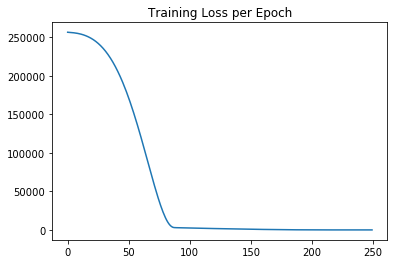

In [ ]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [27]:
model.metrics_names

[]

In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example data shapes
X_train = np.random.rand(140, 10)  # 140 samples, 10 features
y_train = np.random.rand(140, 1)   # 140 samples, 1 target value

# Check the shapes of X_train and y_train
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Build a model that matches the input shape of X_train (10 features)
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))  # Updated input shape to match X_train (10 features)
model.add(Dense(1, activation='linear'))  # Assuming a regression problem (1 output)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model's input and output shapes
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

# Evaluate the model (this will not be meaningful yet as the model hasn't been trained)
training_score = model.evaluate(X_train, y_train, verbose=0)
print(f"Training score: {training_score}")


Shape of X_train: (140, 10)
Shape of y_train: (140, 1)
Model input shape: (None, 10)
Model output shape: (None, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training score: 0.3078726828098297


# Describing a simple ANN

-------------------
#Input Layer:

##10 Features:

The model expects input data with 10 features per sample. This is specified by input_shape=(10,) in the first Dense layer.

----------------
##Hidden Layer:

64 Neurons: The first Dense layer has 64 neurons.

Connections: Each of the 10 input features is connected to all 64 neurons in this hidden layer.

Activation Function: The ReLU (Rectified Linear Unit) activation function is applied to the output of these 64 neurons.

------------------
##Output Layer:

1 Neuron: The second Dense layer (the output layer) has 1 neuron.

Connections: Each of the 64 neurons in the hidden layer is connected to this single output neuron.

Activation Function: The output neuron uses a linear activation function, which means it produces a continuous value.

-------------------------
Visual Representation:

    Input Layer (10 features)
         |
         V
    Hidden Layer (64 neurons) - with ReLU activation
         |
         V

Output Layer (1 neuron) - with linear activation

---------------------
#Key Points:
Input to Hidden Layer: 10 input features are fully connected to 64 neurons in the hidden layer.

Hidden to Output Layer: Each of the 64 neurons in the hidden layer is fully connected to the single neuron in the output layer.

This setup allows the network to learn complex relationships between the 10 input features and the single output value.

In [42]:
training_score

0.3078726828098297

In [50]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example data shapes
X_train = np.random.rand(140, 10)  # 140 samples, 10 features
y_train = np.random.rand(140, 1)   # 140 samples, 1 target value

# Check the shapes of X_train and y_train
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Build a model that matches the input shape of X_train (10 features)
model = Sequential() # This line was missing, causing the 'ellipsis' object error
model.add(Dense(64, input_shape=(10,), activation='relu'))  # Updated input shape to match X_train (10 features)
model.add(Dense(1, activation='linear'))  # Assuming a regression problem (1 output)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model's input and output shapes
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

# Assuming you have test data (X_test and y_test) - This is example data
X_test = np.random.rand(140, 10)
y_test = np.random.rand(140, 1)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test score: {test_score}")

test_score # Now you can access test_score

Shape of X_train: (140, 10)
Shape of y_train: (140, 1)
Model input shape: (None, 10)
Model output shape: (None, 1)
Test score: 0.18590283393859863


0.18590283393859863

In [49]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example data shapes
X_train = np.random.rand(140, 10)  # 140 samples, 10 features
y_train = np.random.rand(140, 1)   # 140 samples, 1 target value

# Check the shapes of X_train and y_train
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Build a model that matches the input shape of X_train (10 features)
model = Sequential() # This line was missing, causing the 'ellipsis' object error
model.add(Dense(64, input_shape=(10,), activation='relu'))  # Updated input shape to match X_train (10 features)
model.add(Dense(1, activation='linear'))  # Assuming a regression problem (1 output)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model's input and output shapes
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

# Assuming you have test data (X_test and y_test) - This is example data
X_test = np.random.rand(140, 10)
y_test = np.random.rand(140, 1)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test score: {test_score}")

test_score # Now you can access test_score

Shape of X_train: (140, 10)
Shape of y_train: (140, 1)
Model input shape: (None, 10)
Model output shape: (None, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test score: 0.2731589674949646


0.2731589674949646

# Characteristics of the Linear Activation Function:
--------------------
## No Transformation:

The linear activation function does not transform the output; it passes the input directly through.

This means it doesn't introduce any non-linearity into the model.

-----------------
## Suitable for Regression:

It is typically used in the output layer of regression models where the goal is to predict a continuous value.

Since the output should be a direct, unbounded value (e.g., predicting a price, temperature, etc.), a linear activation function is appropriate.

-----------------
##Output Range:

The output of a linear activation function is not bounded, meaning it can range from
$$
−∞

to

+
∞$$

This is useful for tasks where predictions are not constrained to a specific range.

--------------------------
Example in a Neural Network:

    model.add(Dense(1, activation='linear'))

Dense(1):

The output layer has 1 neuron.

activation='linear':

The neuron in this layer uses a linear activation function.

This setup is typically used for:

Regression tasks: Where you want to predict a continuous value (e.g., predicting prices, temperatures, etc.).

---------------------
#Summary
activation='linear' means the output of the neuron is a direct linear combination of the inputs and biases.

It is commonly used in the output layer for regression problems to provide a continuous output without transformation.

### Further Evaluations

In [51]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [52]:
pred_df

,Test Y
0,0.455206
1,0.132693
2,0.487057
3,0.400527
4,0.793684
...,...
135,0.080523
136,0.974575
137,0.792148
138,0.616994


In [54]:
# Assuming 'model' is your trained Keras model and 'X_test' is your test data
test_predictions = model.predict(X_test)

# Now you can reshape the predictions if needed
test_predictions = pd.Series(test_predictions.reshape(140,)) # The original code had 300 which is not the correct shape

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [55]:
test_predictions

,0
0,0.392202
1,-0.032488
2,0.070179
3,0.447450
4,0.150869
...,...
135,0.153144
136,0.158725
137,0.257856
138,0.124804


In [57]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [58]:
pred_df.columns = ['Test Y','Model Predictions']

In [59]:
pred_df

,Test Y,Model Predictions
0,0.455206,0.392202
1,0.132693,-0.032488
2,0.487057,0.070179
3,0.400527,0.447450
4,0.793684,0.150869
...,...,...
135,0.080523,0.153144
136,0.974575,0.158725
137,0.792148,0.257856
138,0.616994,0.124804


Let's compare to the real test labels!

<Axes: xlabel='Test Y', ylabel='Model Predictions'>

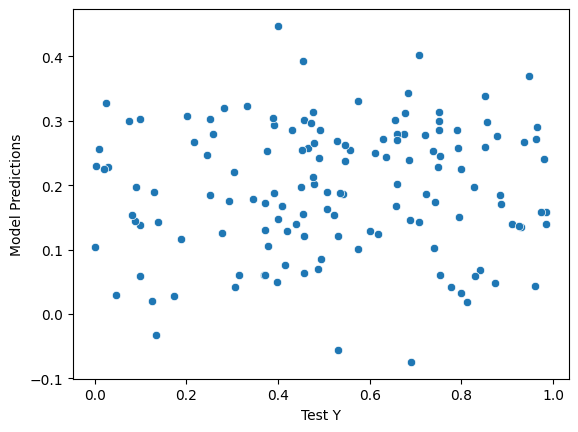

In [60]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [61]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

<ipython-input-62-12727d456eec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<Axes: xlabel='Error', ylabel='Density'>

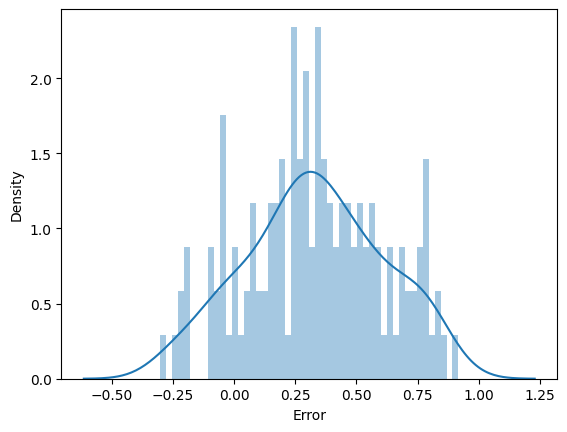

In [62]:
sns.distplot(pred_df['Error'],bins=50)

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [64]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

0.36310794927228596

In [65]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

0.18590283015904463

In [66]:
# Essentially the same thing, difference just due to precision
test_score

0.18590283393859863

In [67]:
#RMSE
test_score**0.5

0.43116450913612847

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [68]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [69]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [ ]:
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

## Saving and Loading a Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
later_model = load_model('my_model.h5')

In [ ]:
later_model.predict(new_gem)

array([[421.31326]], dtype=float32)